## TOUR GUIDE: TRAVEL PACKAGE PURCHASE MODEL DEVELOPMENT

### AUTHOR: KARTHIK THALLAM

### STUDENT ID: 500188370
------------------------------------

![](https://migahbooking.com/wp-content/uploads/2017/11/Discount-Travel-Package-1000x675.jpg)


##### Source: [TravelPackage](https://migahbooking.com/wp-content/uploads/2017/11/Discount-Travel-Package-1000x675.jpg)

--------
### Objective:

##### To predict which customer is more likely to purchase the newly introduced travel package
-------

### Data Dictionary:

1.	`CustomerID`: Unique customer ID


2.	`ProdTaken`: Whether the customer has purchased a package or not (0: No, 1: Yes)


3.	`Age`: Age of customer


4.	`TypeofContact`: How customer was contacted (Company Invited or Self Inquiry)


5.	`CityTier`: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3


6.	`Occupation`: Occupation of customer


7.	`Gender`: Gender of customer


8.	`NumberOfPersonVisiting`: Total number of persons planning to take the trip with the customer


9.	`PreferredPropertyStar`: Preferred hotel property rating by customer


10.	`MaritalStatus`: Marital status of customer


11.	`NumberOfTrips`: Average number of trips in a year by customer


12.	`Passport`: The customer has a passport or not (0: No, 1: Yes)


13.	`OwnCar`: Whether the customers own a car or not (0: No, 1: Yes)


14.	`NumberOfChildrenVisiting`: Total number of children with age less than 5 planning to take the trip with the customer


15.	`Designation`: Designation of the customer in the current organization


16.	`MonthlyIncome`: Gross monthly income of the customer

### Customer Interaction Data:

1.	`PitchSatisfactionScore`: Sales pitch satisfaction score


2.	`ProductPitched`: Product pitched by the salesperson


3.	`NumberOfFollowups`: Total number of follow-ups has been done by the salesperson after the sales pitch


4.	`DurationOfPitch`: Duration of the pitch by a salesperson to the customer

-------------

#### Import the Libraries and Packages:

In [1]:
import warnings
warnings.filterwarnings("ignore")     #to remove the warning verbose

import pandas as pd      #open-source package for handling the data and perform analysis on it
import numpy as np       #open-source package for statistical analysis


import matplotlib.pyplot as plt     #for visualization
import seaborn as sns               #for visualization
     

from sklearn.model_selection import train_test_split    #library to split the data randomly 

from sklearn.preprocessing import RobustScaler    #library used for robust scaling 


from sklearn.model_selection import KFold                 #library to perform K-Fold validation
from sklearn.model_selection import cross_val_score      #library to perform cross validations
from sklearn.model_selection import GridSearchCV        #library for tuning hyperparameters through GridSearch

#libraries for metrics calculation
from sklearn.metrics import classification_report, confusion_matrix, f1_score


#all the machine learning model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#tools for pipelining, saving and loading the models
import joblib
from joblib import dump
from joblib import load

from datetime import datetime   #library for checking the run time 
%matplotlib inline

#### Load the data:

In [2]:
df = pd.read_excel('Tourism.xlsx', sheet_name='Tourism')   #to load the dataset as a dataframe using pandas

In [3]:
df.head()     #to see first 5 records of our dataset

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.tail()    #to see the last 5 records of our dataset 

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


#### Data Types and Data Gist:

In [5]:
df.info()      #basic overview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
df.dtypes        #data types of each column in our dataframe

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

* `We have 4888 records spread across 20 fields`


* `The dataset contains 7 columns of float type containing real values with integers and fraction parts`


* `We have 7 integer columns which means +ve or -ve values with no decimal points`


* `We have 6 object type columns which means Categorical string data in Pandas where we can perform only string operations instead of mathematical operations`

##### Let's drop the Customer ID column which is of no use for model building as it is not giving any distinguished information

In [7]:
df = df.drop('CustomerID', axis=1)

df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

##### Descriptive Statistics:

In [8]:
df.describe()    #statistical overview of numerical columns of the dataset

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


* `We can see the range of values across several fields have been very different. So, it is required to perform Scaling on the dataset before developing the model`


* `The average age of customers is around 38 years while 75% of the customers were having an age of under 45 years`


* `The average no. of people visiting with the customer is around 3 people`


* `Minimum duration of the pitch by a salesperson to the customer was 5 min`


* `The average duration of the pitch by a salesperson to the customer was around 15 min` 


* `The average no.of followups taken by a salesperson after pitching the sales to the customer is around 4`


* `On an average, customers are choosing a hotel rated around 3.5 stars` 


* `The avearage no. of trips completed in a year by a customer is around 3`


* `On an average, each customer is bringing 1 child for the trip`


* `The average gross monthly income of a customer is around 23619 dollars`

##### Unique values in the Categorical Columns of the dataset:

In [9]:
#taking all the categorical meaning fields into one list for iteration

cat_fields = ['Designation', 'ProdTaken', 'OwnCar', 
              'Passport', 'CityTier','MaritalStatus', 
              'ProductPitched','Gender','Occupation','TypeofContact'] 

In [10]:
#printing unique values and their counts in each categorical column using for loop

for col in cat_fields:
    
    print('Unique Values in', col, 'are: ')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print(df[col].value_counts())              
    print()

Unique Values in Designation are: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

Unique Values in ProdTaken are: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0    3968
1     920
Name: ProdTaken, dtype: int64

Unique Values in OwnCar are: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1    3032
0    1856
Name: OwnCar, dtype: int64

Unique Values in Passport are: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0    3466
1    1422
Name: Passport, dtype: int64

Unique Values in CityTier are: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1    3190
3    1500
2     198
Name: CityTier, dtype: int64

Unique Values in MaritalStatus are: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Unique Values in ProductPitched are: 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe

* `We can see that Single and Unmarried are not same. Single means having no partners`


* `The data contains some values entered as Fe male instead of Female, which needs top be fixed`


* `Most of the travel customers belongs to Tier-1 cities`


* `Very few people have passports with them`


* `Most of the customers have contacted the company by themselves and very few customers have been contacted by the company`

------------------------------------
#### Data Processing and Cleaning:

##### Let's fix the Gender column:

In [11]:
#using lamda function to replace the misspelled words

df['Gender'] = df['Gender'].apply(lambda value: 'Female' if value == 'Fe Male' else value )     

In [12]:
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

##### Let's fix the data types of columns:

* `We can see a few columns such as OwnCar etc., are of int64 data types. But they are appealing as Categorical columns. So, let's convert all the columns which are appealing to us as Categories, into Categorical data type except our Target variable:`

In [13]:
#Converting the data types of above such columns to Categorical:

cat_cols = ['Designation', 'OwnCar', 
              'Passport', 'CityTier','MaritalStatus', 
              'ProductPitched','Gender','Occupation','TypeofContact'] 

df[cat_cols] = df[cat_cols].astype('category')

df.dtypes    #to view the datatypes of columns

ProdTaken                      int64
Age                          float64
TypeofContact               category
CityTier                    category
DurationOfPitch              float64
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar        float64
MaritalStatus               category
NumberOfTrips                float64
Passport                    category
PitchSatisfactionScore         int64
OwnCar                      category
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
dtype: object

### Exploratory Data Analysis:

**Our objective is to predict which customer is more likely to purchase the newly introduced travel package. So, let's consider ProdTaken as our Target variable**

**So, let's explore our data with regards to the objective and find the underlying patterns**

##### Let's analyze the feature 'Gender':

In [14]:
#creating a pivot table where Gender as Category and values as ProdTaken

gender_pivot = df.pivot_table(index='Gender', values='ProdTaken')
gender_pivot

,ProdTaken
Gender,
Female,0.173428
Male,0.198217


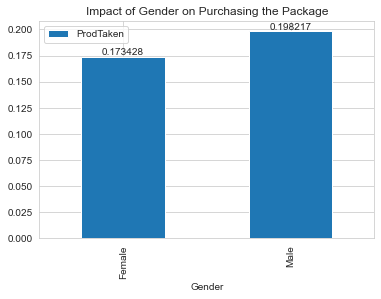

In [15]:
#labelled barplot showing ProdTaken against the Gender category

sns.set_style('whitegrid')  #setting up the graph style using seaborn styling options

ax = gender_pivot.plot.bar()
ax.bar_label(ax.containers[0])
plt.title('Impact of Gender on Purchasing the Package')
plt.show()

* `Although there is no significant difference between Male and Female, Male are more likely to purchase the package`

##### Let's analyze the feature 'PreferedPropertyStar':

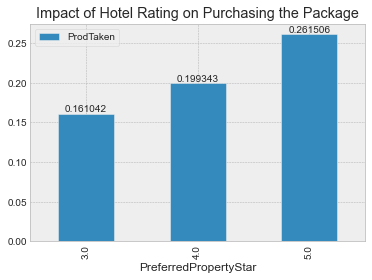

In [16]:
plt.style.use('bmh')    #setting up the style for canvas

#creating a pivot table and plotting labelled bar graph where PreferredPropertStar as Category and values as ProdTaken
pps_pivot = df.pivot_table(index='PreferredPropertyStar', values='ProdTaken')
ax = pps_pivot.plot.bar()
ax.bar_label(ax.containers[0])
plt.title('Impact of Hotel Rating on Purchasing the Package')
plt.show()

* `Customers who preferred 5 star property are more likely to purchase the package`

##### Let's analyze the feature 'Age':

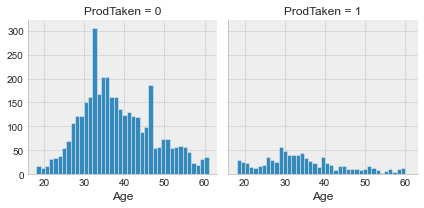

In [17]:
plt.style.use('bmh')   #setting the style for canvas

#FacetGrid where Age as the category and filling values as ProdTaken
grid1 = sns.FacetGrid(data=df, col='ProdTaken')

#plotting a histogram showing the distribution of Age against the ProdTaken category
grid1.map(plt.hist, 'Age', bins=40)

* `Let's do Data Binning on the Age column to get more details`

##### Data Binning:

In [18]:
df['Age'].min()   #to get min value of Age column

18.0

In [19]:
df['Age'].max()   #to get max value of Age column

61.0

In [20]:
#binning the data and assigning the labels to the segmented parts

df['Age_Group'] = pd.cut(df['Age'], 
                         bins = [18,25, 31, 40, 50, 62], 
                         labels = ['18-25','26-30', '31-40', '41-50', '51-62'])

In [21]:
df['Age_Group'].value_counts()

31-40    1722
41-50    1073
26-30     971
51-62     549
18-25     333
Name: Age_Group, dtype: int64

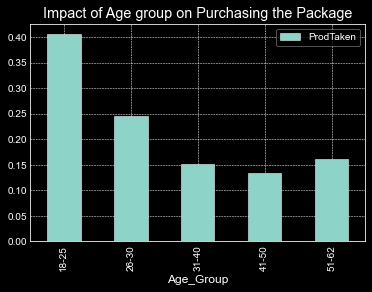

In [22]:
plt.style.use('dark_background')    #setting up the style for canvas

#Creating a pivot table and plotting a bar graph where Age Group as the category and filling values as ProdTaken
pps_pivot = df.pivot_table(index='Age_Group', values='ProdTaken')
pps_pivot.plot.bar()
plt.title('Impact of Age group on Purchasing the Package')
plt.show()

* `Age group 18-25 purchased more no. of packages followed by 26-30 age group and the least no. of packages have been bought by 41-50 age group`

##### Let's analyze our Target variable:

Text(0.5, 1.0, 'Package Purchase status')

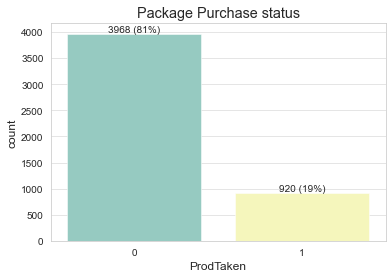

In [23]:
sns.set_style('whitegrid')  #setting up the graph style using seaborn styling options

#countplot showing count of each unique value of the field
ax = sns.countplot(x=df['ProdTaken'], order=df['ProdTaken'].value_counts(ascending=False).index)

#creating a labelled count plot with absolute and relative values
abs_values = df['ProdTaken'].value_counts(ascending=False)
rel_values = df['ProdTaken'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title('Package Purchase status')

* `Pretty much un-balanced label and that's common with classification problems and we can probably expect the model to do well in terms of accuracy but our precision & recall are going to be the two metrics that we will have to evaluate our model based off of and we shouldn't expect our model to perform well on those metrics because of un-balanced dataset`


* `So, we have to evaluate our model using F1-score or we can use techniques like SMOTE to oversample the minority class`


##### Let's analyze the feature 'Age' and its measures of central tendencies:

Lower limit is 28.305878089630703:
Upper limit is 46.938652154899536:


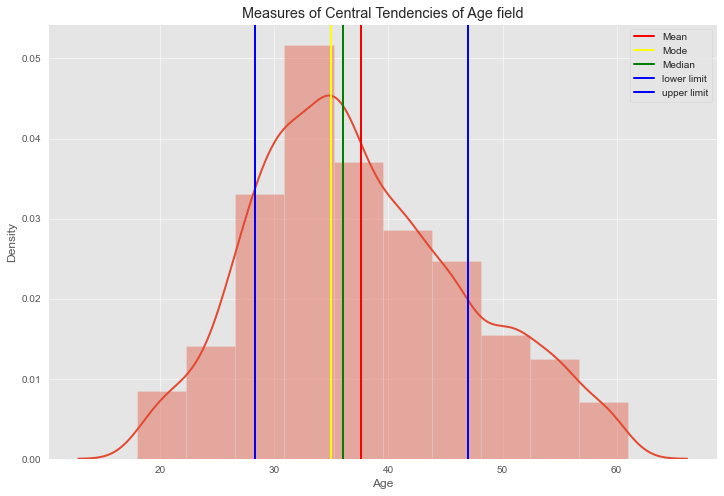

In [24]:
plt.figure(figsize=(12,8))  #resetting the size of the figure in the canvas
plt.style.use('ggplot')     #setting up the style of the graph using matplotlib

#calculating the measures of central tendencies
Mean = df['Age'].mean()     
Mode = df['Age'].mode().values[0]
Median = df['Age'].median()
one_dev = df['Age'].std()

#Plotting distribution of Age and its Mean, Median, Mode & Standard deviations
sns.distplot(df['Age'], bins=10, kde=True)

plt.axvline(Mean, color='red', label='Mean')
plt.axvline(Mode, color='yellow', label='Mode')
plt.axvline(Median, color='green', label='Median')
plt.axvline(Mean-one_dev, color='blue', label='lower limit')
plt.axvline(Mean+one_dev, color='blue', label='upper limit')

plt.title('Measures of Central Tendencies of Age field')
plt.legend()

print('Lower limit is {}:' .format(Mean-one_dev))
print('Upper limit is {}:' .format(Mean+one_dev))

* `The Age column is positively skewed as we can see most of the data falls on the right side of the peak`

##### 1) According to the Emprical rule, we know that 68% of the values fall with in 1 standard deviation of the mean

##### 2) Here, the blue lines are 1 standard deviation away from the mean i.e., almost 68% of the customers are between the age of 28 and 47

##### Let's analyze the feature 'TypeofContact' over 'ProdTaken':

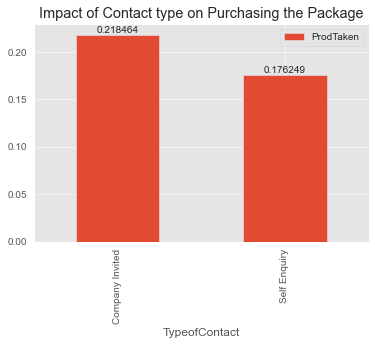

In [25]:
plt.style.use('ggplot')    #setting up the style for graph in canvas

#creating a pivot table and plotting bar graph where TypeofContact as Category and values as ProdTaken
toc_pivot = df.pivot_table(index='TypeofContact', values='ProdTaken')
ax = toc_pivot.plot.bar()
ax.bar_label(ax.containers[0])
plt.title('Impact of Contact type on Purchasing the Package')
plt.show()

* `Although there is no significant difference between Company Invited and Self Enquiry, customers approached by the company are more likely to purchase the package`

Text(0.5, 1.0, 'Type of Contact')

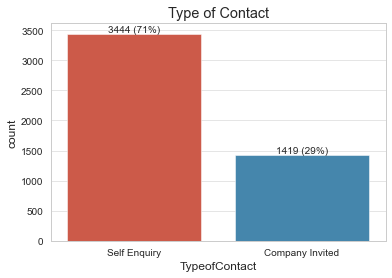

In [26]:
sns.set_style('whitegrid')  #setting up the graph style using seaborn styling options

#countplot showing count of each unique value of the field
ax = sns.countplot(x=df['TypeofContact'], order=df['TypeofContact'].value_counts(ascending=False).index)

#creating a labelled count plot with absolute and relative values
abs_values = df['TypeofContact'].value_counts(ascending=False)
rel_values = df['TypeofContact'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title('Type of Contact')

* `71% of the customers enquired about the package by themselves while only 29% of the customers have been approached by the company`

##### Let's analyze the feature 'CityTier' over 'ProdTaken':

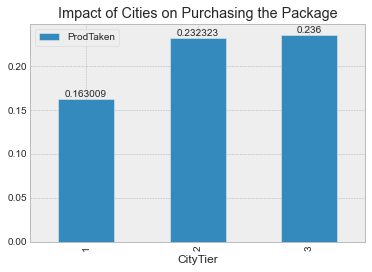

In [27]:
plt.style.use('bmh')    #setting up the style for graph in canvas

#creating a pivot table and plotting bar graph where CityTier as Category and values as ProdTaken
toc_pivot = df.pivot_table(index='CityTier', values='ProdTaken')
ax = toc_pivot.plot.bar()
ax.bar_label(ax.containers[0])
plt.title('Impact of Cities on Purchasing the Package')
plt.show()

* `Customers belonging to the Tier 3 and Tier 2 cities are more likely to purchase the package`

Text(0.5, 1.0, 'Type of Cities')

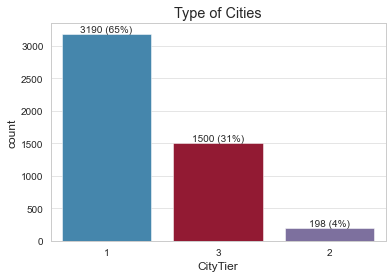

In [28]:
sns.set_style('whitegrid')  #setting up the graph style using seaborn styling options

#countplot showing count of each unique value of the field
ax = sns.countplot(x=df['CityTier'], order=df['CityTier'].value_counts(ascending=False).index)

#creating a labelled count plot with absolute and relative values
abs_values = df['CityTier'].value_counts(ascending=False)
rel_values = df['CityTier'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title('Type of Cities')

* `65% of the customers are from Tier 1 city while only 4% of the customers are from Tier 2 cities. Furthermore, 31% of the customers are from Tier 3 cities`

##### Let's analyze the feature 'DurationOfPitch' over 'ProdTaken':

##### Data Binning:

* `Let's do data binning on the DurationOfPitch column as the values are widely spread`

In [29]:
df['DurationOfPitch'].min()   #to get min value of DurationOfPitch column

5.0

In [30]:
df['DurationOfPitch'].max()   #to get max value of DurationOfPitch column

127.0

In [31]:
#binning the data and assigning the labels to the segmented parts

df['Talk_Duration'] = pd.cut(df['DurationOfPitch'], 
                             bins = [5, 15, 20, 30, 40, 130], 
                             labels = ['(5-15) min','(16-20) min', '(20-30) min', '(30-40) min', '(>40) min'])

In [32]:
df['Talk_Duration'].value_counts()

(5-15) min     2854
(20-30) min     758
(16-20) min     643
(30-40) min     374
(>40) min         2
Name: Talk_Duration, dtype: int64

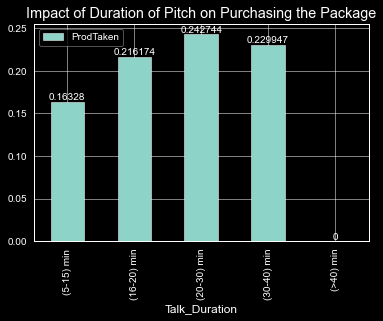

In [33]:
plt.style.use('dark_background')    #setting up the style for graph in canvas

#creating a pivot table and plotting labelled bar graph where Talk_Duration as Category and values as ProdTaken
toc_pivot = df.pivot_table(index='Talk_Duration', values='ProdTaken')
ax = toc_pivot.plot.bar()
ax.bar_label(ax.containers[0])
plt.title('Impact of Duration of Pitch on Purchasing the Package')
plt.show()

* `Customers receiving Pitch duration between 20-30 min are more likely to purchase the package. While the customers receiving pitch duration between 16-20 min and 30-40 min also more likely to purchase the package but not as effective as 20-30 min talk. Customers receiving prolonged talk (>40 min) have got no interest in purchasing the package`

Lower limit is 6.971192001926264:
Upper limit is 24.010477180734938:


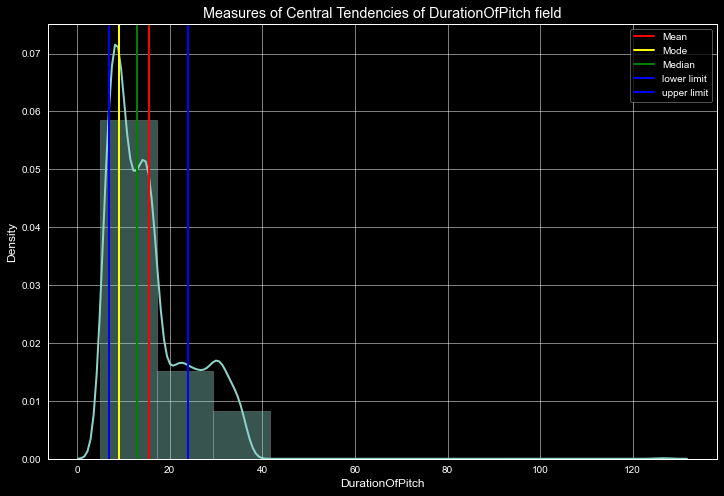

In [34]:
plt.figure(figsize=(12,8))  #resetting the size of the figure in the canvas
plt.style.use('dark_background')     #setting up the style of the graph using matplotlib

#calculating the measures of central tendencies
Mean = df['DurationOfPitch'].mean()     
Mode = df['DurationOfPitch'].mode().values[0]
Median = df['DurationOfPitch'].median()
one_dev = df['DurationOfPitch'].std()

#Plotting distribution of DurationOfPitch and its Mean, Median, Mode & Standard deviations
sns.distplot(df['DurationOfPitch'], bins=10, kde=True)

plt.axvline(Mean, color='red', label='Mean')
plt.axvline(Mode, color='yellow', label='Mode')
plt.axvline(Median, color='green', label='Median')
plt.axvline(Mean-one_dev, color='blue', label='lower limit')
plt.axvline(Mean+one_dev, color='blue', label='upper limit')

plt.title('Measures of Central Tendencies of DurationOfPitch field')
plt.legend()

print('Lower limit is {}:' .format(Mean-one_dev))
print('Upper limit is {}:' .format(Mean+one_dev))

##### 1) According to the Emprical rule, we know that 68% of the values fall with in 1 standard deviation of the mean

##### 2) Here, the blue lines are 1 standard deviation away from the mean i.e., almost 68% of the customers received a pitch of duration between 7 min to 24 min

##### Let's analyze the feature 'Occupation' over 'ProdTaken':

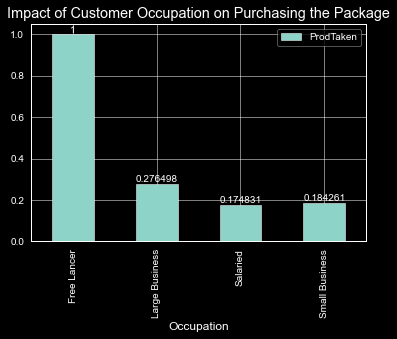

In [35]:
plt.style.use('dark_background')    #setting up the style for graph in canvas

#creating a pivot table and plotting labelled bar graph where Occupation as Category and values as ProdTaken
occ_pivot = df.pivot_table(index='Occupation', values='ProdTaken')
ax = occ_pivot.plot.bar()
ax.bar_label(ax.containers[0])
plt.title('Impact of Customer Occupation on Purchasing the Package')
plt.show()

* `It can be seen that Customers doing free lancing are more likely to purchae the package but we have to consider the value count of no. of free lancers in our data`


* `Customers with large business are more likely to purchase the package although the difference in not significantly huge compared to Salried and Small business customers`

Text(0.5, 1.0, 'Customer Occuaptions')

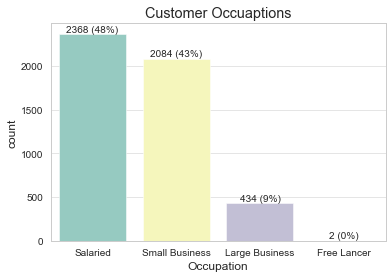

In [36]:
sns.set_style('whitegrid')  #setting up the graph style using seaborn styling options

#countplot showing count of each unique value of the field
ax = sns.countplot(x=df['Occupation'], order=df['Occupation'].value_counts(ascending=False).index)

#creating a labelled count plot with absolute and relative values
abs_values = df['Occupation'].value_counts(ascending=False)
rel_values = df['Occupation'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title('Customer Occuaptions')

* `We can see that there are only 2 free lancers in our data while the highest being Salaried followed by Small business and Large business customers`

##### Let's analyze the feature 'NumberOfPersonVisiting' over 'ProdTaken':

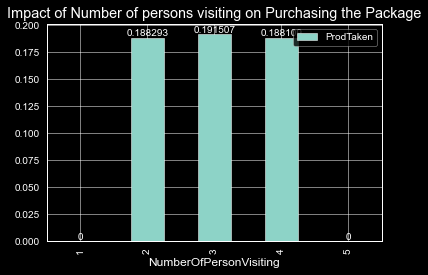

In [37]:
plt.style.use('dark_background')    #setting up the style for graph in canvas

#pivot table and plotting labelled bar graph where No. of persons visiting as Category and values as ProdTaken
visit_pivot = df.pivot_table(index='NumberOfPersonVisiting', values='ProdTaken')
ax = visit_pivot.plot.bar()
ax.bar_label(ax.containers[0])
plt.title('Impact of Number of persons visiting on Purchasing the Package')
plt.show()

* `Customers bringing 2 to 4 people with him for the trip are more likely to purchase the package`

Text(0.5, 1.0, 'Number of persons visiting the trip with the customer')

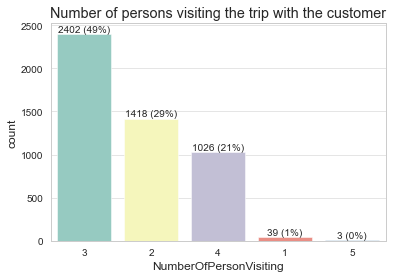

In [38]:
sns.set_style('whitegrid')  #setting up the graph style using seaborn styling options

#countplot showing count of each unique value of the field
ax = sns.countplot(x=df['NumberOfPersonVisiting'], 
                   order=df['NumberOfPersonVisiting'].value_counts(ascending=False).index)

#creating a labelled count plot with absolute and relative values
abs_values = df['NumberOfPersonVisiting'].value_counts(ascending=False)
rel_values = df['NumberOfPersonVisiting'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title('Number of persons visiting the trip with the customer')

* `49% of the customers are taking 3 people with them for the trip, while 29% of the customers are taking 2 people with them for the trip and 21% of the customers are taking 4 people with them for the trip`


* `However only 1% of the customers are taking 1 person with them for the trip while it is found that 3 customers went to the trip without taking anyone with them`

##### Let's analyze the feature 'NumberOfFollowups' over 'ProdTaken':

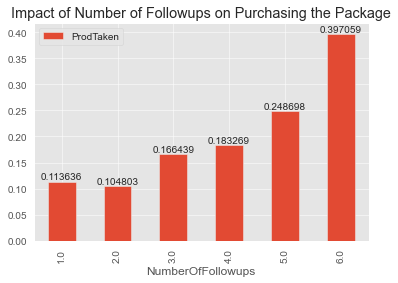

In [39]:
plt.style.use('ggplot')    #setting up the style for graph in canvas

#pivot table and plotting labelled bar graph where No. of Followups visiting as Category and values as ProdTaken
fups_pivot = df.pivot_table(index='NumberOfFollowups', values='ProdTaken')
ax = fups_pivot.plot.bar()
ax.bar_label(ax.containers[0])
plt.title('Impact of Number of Followups on Purchasing the Package')
plt.show()

* `The likelihood of purchasing the package seems to be high if the no. of followups by the salesperson with the customer are more`


* `But data sometimes can be misleading, let's look at the value count of no. of followups`

Text(0.5, 1.0, 'Number of Followups by salesperson with the customer')

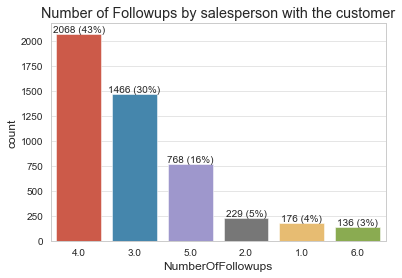

In [40]:
sns.set_style('whitegrid')  #setting up the graph style using seaborn styling options

#countplot showing count of each unique value of the field
ax = sns.countplot(x=df['NumberOfFollowups'], 
                   order=df['NumberOfFollowups'].value_counts(ascending=False).index)

#creating a labelled count plot with absolute and relative values
abs_values = df['NumberOfFollowups'].value_counts(ascending=False)
rel_values = df['NumberOfFollowups'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title('Number of Followups by salesperson with the customer')

* `Most no. of followups made by the salesperson with the customer is 4 followed by 3 and 5. However, the stats illustrates that no. of followups is directly proportional to the likelihood of purchasing the package`

##### Let's analyze the feature 'Passport' over 'ProdTaken':

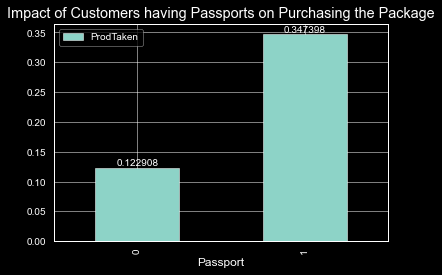

In [41]:
plt.style.use('dark_background')    #setting up the style for graph in canvas

#creating a pivot table and plotting labelled bar graph where Passport as Category and values as ProdTaken
pass_pivot = df.pivot_table(index='Passport', values='ProdTaken')
ax = pass_pivot.plot.bar()
ax.bar_label(ax.containers[0])
plt.title('Impact of Customers having Passports on Purchasing the Package')
plt.show()

* `It shows that Customers having Passport with them are more likely to purchase the package`

Text(0.5, 1.0, 'Customers & Passport')

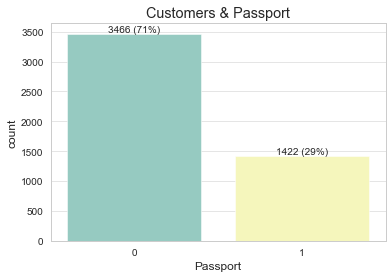

In [42]:
sns.set_style('whitegrid')  #setting up the graph style using seaborn styling options

#countplot showing count of each unique value of the field
ax = sns.countplot(x=df['Passport'], 
                   order=df['Passport'].value_counts(ascending=False).index)

#creating a labelled count plot with absolute and relative values
abs_values = df['Passport'].value_counts(ascending=False)
rel_values = df['Passport'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title('Customers & Passport')

* `71% of the customers went to the trip without having a passport while 29% of the customers have passports with them` 

##### Let's analyze the feature 'NumberOfChildrenVisiting' over 'ProdTaken':

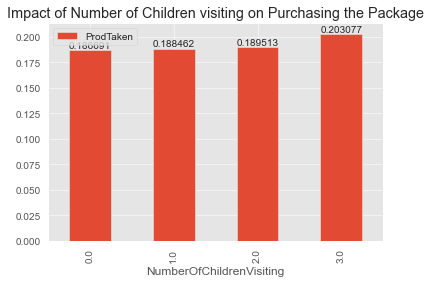

In [43]:
plt.style.use('ggplot')    #setting up the style for graph in canvas

#pivot table and plotting labelled bar graph where NumberOfChildrenVisiting as Category and values as ProdTaken
children_pivot = df.pivot_table(index='NumberOfChildrenVisiting', values='ProdTaken')
ax = children_pivot.plot.bar()
ax.bar_label(ax.containers[0])
plt.title('Impact of Number of Children visiting on Purchasing the Package')
plt.show()

* `Although there is no significant difference on purchasing the package based on Number of children visiting with the customer, it can be seen that customers taking 3 children with them for the trip are more likely to purchase the package compared to customers carrying no children or 1-2 children with them`

Text(0.5, 1.0, 'Number of Children visiting with the customer')

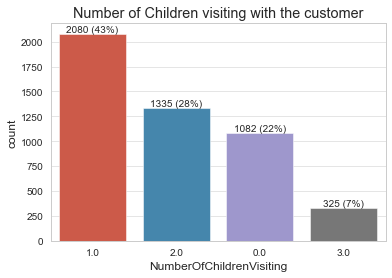

In [44]:
sns.set_style('whitegrid')  #setting up the graph style using seaborn styling options

#countplot showing count of each unique value of the field
ax = sns.countplot(x=df['NumberOfChildrenVisiting'], 
                   order=df['NumberOfChildrenVisiting'].value_counts(ascending=False).index)

#creating a labelled count plot with absolute and relative values
abs_values = df['NumberOfChildrenVisiting'].value_counts(ascending=False)
rel_values = df['NumberOfChildrenVisiting'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title('Number of Children visiting with the customer')

* `43% of the customers are taking 1 child with them for the trip whereas 28% of the customers are taking 2 children and 7% of the customers went to the trip taking 3 children with them. However, 22% of the customers went to the trip without carrying any child with them` 

##### Let's analyze the feature 'Designation' over 'ProdTaken':

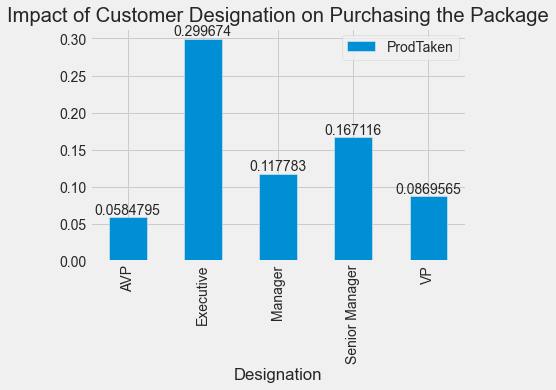

In [45]:
plt.style.use('fivethirtyeight')    #setting up the style for graph in canvas

#creating a pivot table and plotting bar graph where Designation as Category and values as ProdTaken
des_pivot = df.pivot_table(index='Designation', values='ProdTaken')
ax = des_pivot.plot.bar()
ax.bar_label(ax.containers[0])
plt.title('Impact of Customer Designation on Purchasing the Package')
plt.show()

* `Customers with designation as Executive are more likely to purchase the package followed by Senior Managers, Vice Presidents and Managers`

Text(0.5, 1.0, 'Designation of the Customers')

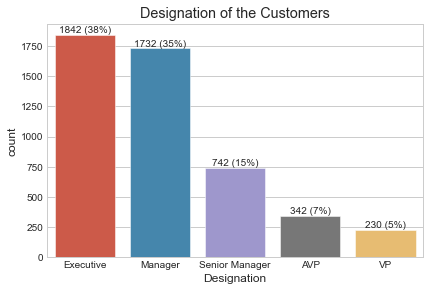

In [46]:
plt.style.use('ggplot')     #setting up the style for graph in canvas
sns.set_style('whitegrid')  #setting up the graph style using seaborn styling options

#countplot showing count of each unique value of the field
ax = sns.countplot(x=df['Designation'], 
                   order=df['Designation'].value_counts(ascending=False).index)

#creating a labelled count plot with absolute and relative values
abs_values = df['Designation'].value_counts(ascending=False)
rel_values = df['Designation'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title('Designation of the Customers')

* `38% of the customers are Executives, 35% of the customers are Managers, 15% of the customers are Senior Managers while the least no. of customers are Vice Presidents in their respective fields`

##### Let's analyze the feature 'MaritalStatus' over 'ProdTaken':

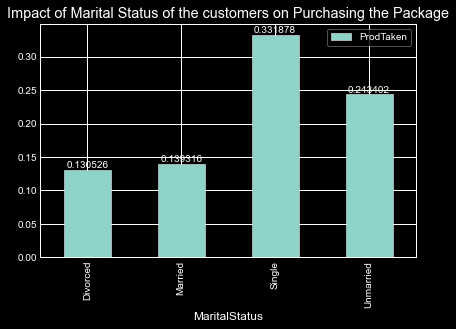

In [47]:
plt.style.use('dark_background')    #setting up the style for graph in canvas

#creating a pivot table and plotting bar graph where MaritalStatus as Category and values as ProdTaken
mar_pivot = df.pivot_table(index='MaritalStatus', values='ProdTaken')
ax = mar_pivot.plot.bar()
ax.bar_label(ax.containers[0])
plt.title('Impact of Marital Status of the customers on Purchasing the Package')
plt.show()

* `Customers whose marital status is Single and Unmarried are more likely to purchase the package compared to the Divorced and Married`

Text(0.5, 1.0, 'Marital status of the customers')

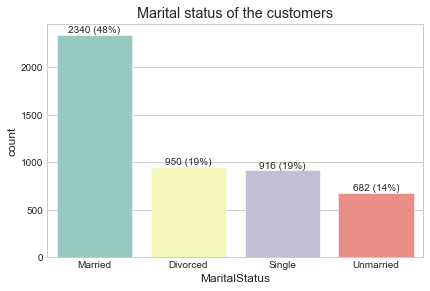

In [48]:
sns.set_style('whitegrid')  #setting up the graph style using seaborn styling options

#countplot showing count of each unique value of the field
ax = sns.countplot(x=df['MaritalStatus'], 
                   order=df['MaritalStatus'].value_counts(ascending=False).index)

#creating a labelled count plot with absolute and relative values
abs_values = df['MaritalStatus'].value_counts(ascending=False)
rel_values = df['MaritalStatus'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title('Marital status of the customers')

* `48% of the customers are Married while 19% of the customers are Divorced. Also, 19% of the customers are Single and 14% of the customers are Unmarried`

##### Let's analyze the feature 'NumberOfTrips' over 'ProdTaken':

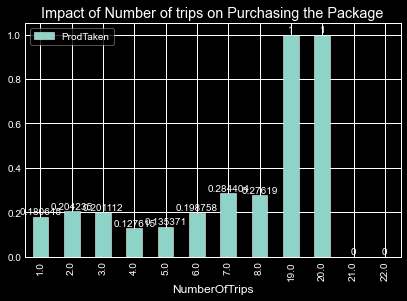

In [49]:
plt.style.use('dark_background')    #setting up the style for graph in canvas

#creating a pivot table and plotting labelled bar graph where NumberOfTrips as Category and values as ProdTaken
trips_pivot = df.pivot_table(index='NumberOfTrips', values='ProdTaken')
ax = trips_pivot.plot.bar()
ax.bar_label(ax.containers[0])
plt.title('Impact of Number of trips on Purchasing the Package')
plt.show()

* `Customers who are making trips 19-20 times per year on an average, are more likely to purchase the package. However, there is no big difference in purchasing the package by the customers who make 1-8 trips per year on an average`


* `But the customers who make 21-22 trips per year on an average have shown no interest in purchasing the package`


* `But to believe in this stats, we have to look at the value count of the no. of trips to see how much fairly relevant information we can get from it`

Text(0.5, 1.0, 'Average no. of trips by the Customer in an Year')

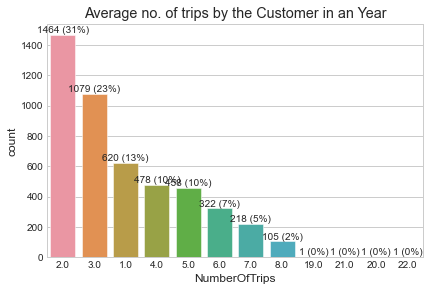

In [50]:
sns.set_style('whitegrid')  #setting up the graph style using seaborn styling options

#countplot showing count of each unique value of the field
ax = sns.countplot(x=df['NumberOfTrips'], 
                   order=df['NumberOfTrips'].value_counts(ascending=False).index)

#creating a labelled count plot with absolute and relative values
abs_values = df['NumberOfTrips'].value_counts(ascending=False)
rel_values = df['NumberOfTrips'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title('Average no. of trips by the Customer in an Year')

* `With our previous findings, where we found that Customers who made 19-20 trips per year on average are more likely to purchase the package. But this finding doesn't have enough data to support it.`


* `31% of the customers are making 2 trips on an average in a year while 23% of the customers make 3 trips and 13% of the customers make 1 trip on an average in a year`

##### Let's analyze the feature 'ProductPitched' over 'ProdTaken':

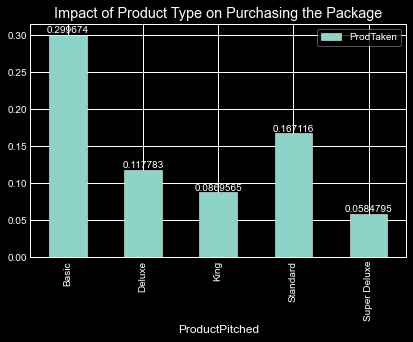

In [51]:
plt.style.use('dark_background')    #setting up the style for graph in canvas

#creating a pivot table and plotting bar graph where ProductPitched as Category and values as ProdTaken
pp_pivot = df.pivot_table(index='ProductPitched', values='ProdTaken')
ax = pp_pivot.plot.bar()
ax.bar_label(ax.containers[0])
plt.title('Impact of Product Type on Purchasing the Package')
plt.show()

* `Customers who were pitched with Basic product type are more likely to purchase the package. After Basic, its the Standard product type that attracted most of the customer followed by Deluxe while the least interest in purchasing the package was seen with Super Deluxe type`

Text(0.5, 1.0, 'Product pitched by Salesperson to the Customer')

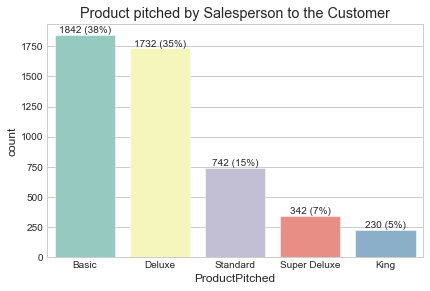

In [52]:
sns.set_style('whitegrid')  #setting up the graph style using seaborn styling options

#countplot showing count of each unique value of the field
ax = sns.countplot(x=df['ProductPitched'], 
                   order=df['ProductPitched'].value_counts(ascending=False).index)

#creating a labelled count plot with absolute and relative values
abs_values = df['ProductPitched'].value_counts(ascending=False)
rel_values = df['ProductPitched'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title('Product pitched by Salesperson to the Customer')

* `Earlier we found that Basic type attarcts the customers to purchase the package and we can see that we have enough data to support this stats as 38% of the customers were pitched with Basic product type by the Salesperson`


* `35% of the customers were pitched with Deluxe type while 15% of the customers were pitched with Standard product type`

##### Let's analyze the feature 'MonthlyIncome' over 'ProdTaken':

Lower limit is 18239.1551301784:
Upper limit is 29000.551851561664:


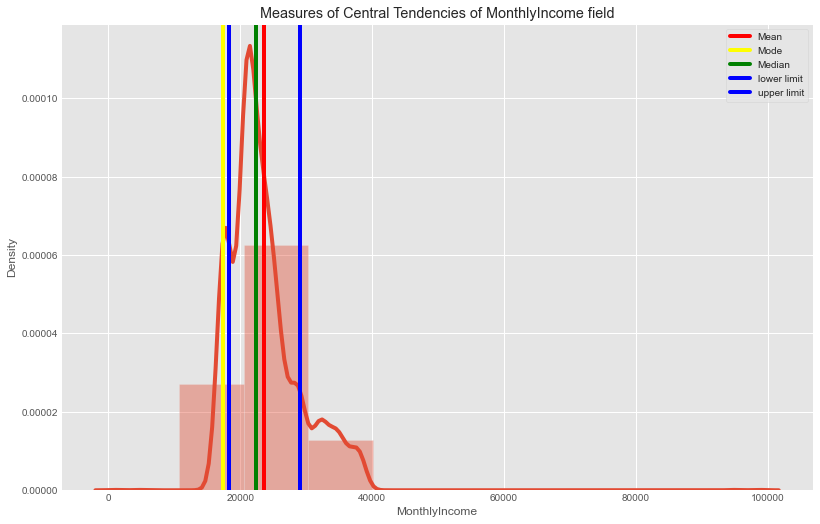

In [53]:
plt.figure(figsize=(12,8))  #resetting the size of the figure in the canvas
plt.style.use('ggplot')     #setting up the style of the graph using matplotlib

#calculating the measures of central tendencies
Mean = df['MonthlyIncome'].mean()     
Mode = df['MonthlyIncome'].mode().values[0]
Median = df['MonthlyIncome'].median()
one_dev = df['MonthlyIncome'].std()

#Plotting distribution of MonthlyIncome and its Mean, Median, Mode & Standard deviations
sns.distplot(df['MonthlyIncome'], bins=10, kde=True)

plt.axvline(Mean, color='red', label='Mean')
plt.axvline(Mode, color='yellow', label='Mode')
plt.axvline(Median, color='green', label='Median')
plt.axvline(Mean-one_dev, color='blue', label='lower limit')
plt.axvline(Mean+one_dev, color='blue', label='upper limit')

plt.title('Measures of Central Tendencies of MonthlyIncome field')
plt.legend()

print('Lower limit is {}:' .format(Mean-one_dev))
print('Upper limit is {}:' .format(Mean+one_dev))

##### 1) According to the Emprical rule, we know that 68% of the values fall with in 1 standard deviation of the mean

##### 2) Here, the blue lines are 1 standard deviation away from the mean i.e., almost 68% of the customers have a gross monthly income between 18240 dollars and 29000 dollars.

##### Data Binning:

In [54]:
df['MonthlyIncome'].min()   #to get min value of MonthlyIncome column

1000.0

In [55]:
df['MonthlyIncome'].max()   #to get max value of MonthlyIncome column

98678.0

In [56]:
#binning the data and assigning the labels to the segmented parts

df['Income_Group'] = pd.cut(df['MonthlyIncome'], 
                         bins = [1000,21000, 41000, 61000, 81000, 100000], 
                         labels = ['1k-21k','21k-41k', '41k-61k', '61k-81k', '81k-100k'])

In [57]:
df['Age_Group'].value_counts()

31-40    1722
41-50    1073
26-30     971
51-62     549
18-25     333
Name: Age_Group, dtype: int64

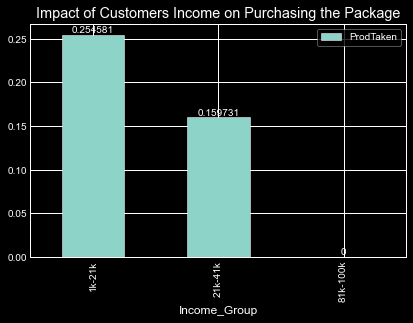

In [58]:
plt.style.use('dark_background')    #setting up the style for canvas

#Creating a pivot table and plotting a bar graph where Income_Group as the category and filling values as ProdTaken
ig_pivot = df.pivot_table(index='Income_Group', values='ProdTaken')
ax = ig_pivot.plot.bar()
ax.bar_label(ax.containers[0])
plt.title('Impact of Customers Income on Purchasing the Package')
plt.show()

* `Customers earning 1k-21k monthly are more likely to purchase the package followed by cutomers earning 21k-41k dollars monthly`

Text(0.5, 1.0, 'Gross Monthly Income of the Customers')

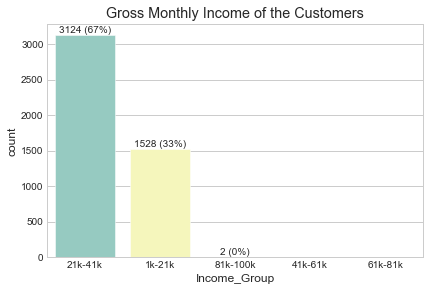

In [59]:
sns.set_style('whitegrid')  #setting up the graph style using seaborn styling options

#countplot showing count of each unique value of the field
ax = sns.countplot(x=df['Income_Group'], 
                   order=df['Income_Group'].value_counts(ascending=False).index)

#creating a labelled count plot with absolute and relative values
abs_values = df['Income_Group'].value_counts(ascending=False)
rel_values = df['Income_Group'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title('Gross Monthly Income of the Customers')

* `67% of the customers are earning 21k-41k per month where as 33% of the customers are earning 1k-21k dollars per month and only 2 customers are having a gross monthly income between 81k-100k`

##### Let's analyze the feature 'PitchSatisfactionScore' over 'ProdTaken':

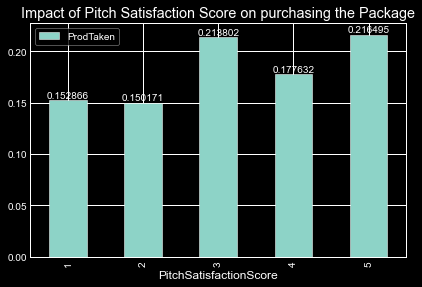

In [60]:
plt.style.use('dark_background')    #setting up the style for graph in canvas

#creating a pivot table and plotting bar graph where PitchSatisfactionScore as Category and values as ProdTaken
pss_pivot = df.pivot_table(index='PitchSatisfactionScore', values='ProdTaken')
ax = pss_pivot.plot.bar()
ax.bar_label(ax.containers[0])
plt.title('Impact of Pitch Satisfaction Score on purchasing the Package')
plt.show()

* `Customers giving pitch satisfaction score of 5 and 3 are more likely to purchase the package. Although the differece is not significantly huge for purchasing the package with other pitch satisfaction scores`

Text(0.5, 1.0, 'Pitch satisfaction scores')

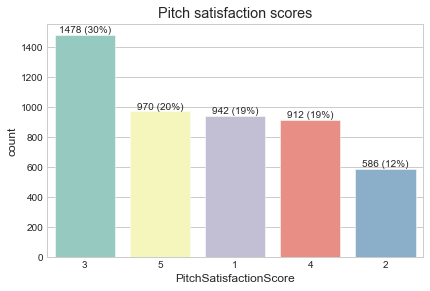

In [61]:
sns.set_style('whitegrid')  #setting up the graph style using seaborn styling options

#countplot showing count of each unique value of the field
ax = sns.countplot(x=df['PitchSatisfactionScore'], 
                   order=df['PitchSatisfactionScore'].value_counts(ascending=False).index)

#creating a labelled count plot with absolute and relative values
abs_values = df['PitchSatisfactionScore'].value_counts(ascending=False)
rel_values = df['PitchSatisfactionScore'].value_counts(ascending=False, normalize=True).values * 100

lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

plt.title('Pitch satisfaction scores')

* `30% of the customers gave a satisfaction score of 3 for the pitch while 20% of the customers gave a satisfaction score of 5 for the pitch`


* `Also 19% of the customers gave a satisfaction score of 1 and 4 for the pitch they received from the salesperson`


* `However, only 12% of the customers gave a satisfaction score of 2 for the pitch they received from the salesperson` 

##### Let's drop the columns which are binned: 

In [62]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome', 'Age_Group',
       'Talk_Duration', 'Income_Group'],
      dtype='object')

In [63]:
df = df.drop(['Age', 'MonthlyIncome', 'DurationOfPitch'], axis = 1)   #dropping the 3 binned columns

df.columns

Index(['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting',
       'Designation', 'Age_Group', 'Talk_Duration', 'Income_Group'],
      dtype='object')

In [64]:
df.dtypes    #data type of each column

ProdTaken                      int64
TypeofContact               category
CityTier                    category
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar        float64
MaritalStatus               category
NumberOfTrips                float64
Passport                    category
PitchSatisfactionScore         int64
OwnCar                      category
NumberOfChildrenVisiting     float64
Designation                 category
Age_Group                   category
Talk_Duration               category
Income_Group                category
dtype: object

------------
##### Let's deal with the Missing Data:

In [65]:
df.isnull().sum()      #gives the aggregated null value count in each column

ProdTaken                     0
TypeofContact                25
CityTier                      0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
Age_Group                   240
Talk_Duration               257
Income_Group                234
dtype: int64

* `We have a few missing values across multiple fields in our dataset `

##### Graphical representation of missing values:

Text(0.5, 1.0, 'Missing values in the Dataset (Each yellow line represents a missing value)')

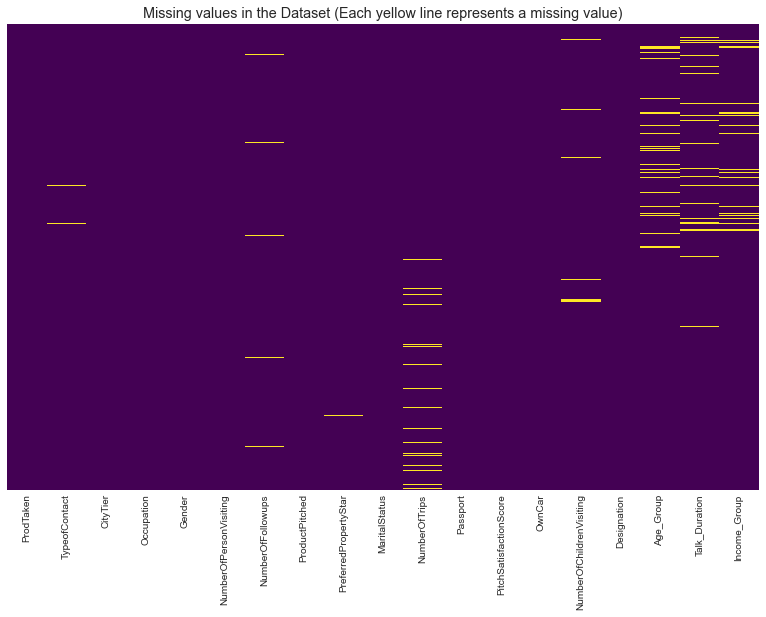

In [66]:
fig = plt.figure(figsize=(12,8))   #to increase the size of the canvas

sns.heatmap(df.isnull() , yticklabels= False , cmap='viridis' , cbar = False)

plt.title('Missing values in the Dataset (Each yellow line represents a missing value)')

* `We can see there a few missing values in several fields of our dataset. So, we can use Missing value imputation techniques for replacing them with appropriate values`

In [67]:
round(df.isnull().sum() / df.isnull().count() * 100, 2)   #to find the percentage of missing values in each field 

ProdTaken                   0.00
TypeofContact               0.51
CityTier                    0.00
Occupation                  0.00
Gender                      0.00
NumberOfPersonVisiting      0.00
NumberOfFollowups           0.92
ProductPitched              0.00
PreferredPropertyStar       0.53
MaritalStatus               0.00
NumberOfTrips               2.86
Passport                    0.00
PitchSatisfactionScore      0.00
OwnCar                      0.00
NumberOfChildrenVisiting    1.35
Designation                 0.00
Age_Group                   4.91
Talk_Duration               5.26
Income_Group                4.79
dtype: float64

* `We can see Age_Group, Talk_Duration, and Income_Group columns have high percentage of missing values`

##### Let's use Frequent Categorical Imputation technique for treating Missing values in Categorical columns:

##### 1) Function to replace NAN values with mode value:

In [68]:
def impute_freq_cat(DataFrame,ColName):
    
    #mode()[0] - gives first category name
    most_frequent_category = DataFrame[ColName].mode()[0]
    
    #replace nan values with most occured category
    DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
    DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)

##### 2) Calling function to impute most occured category:

In [69]:
for Columns in ['TypeofContact','Age_Group','Talk_Duration', 'Income_Group']:
    
    impute_freq_cat(df,Columns)

In [70]:
df.columns

Index(['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting',
       'Designation', 'Age_Group', 'Talk_Duration', 'Income_Group',
       'TypeofContact_Imputed', 'Age_Group_Imputed', 'Talk_Duration_Imputed',
       'Income_Group_Imputed'],
      dtype='object')

##### Display Imputed result:

In [71]:
df[['TypeofContact','TypeofContact_Imputed','Age_Group','Age_Group_Imputed',
    'Talk_Duration','Talk_Duration_Imputed', 
    'Income_Group', 'Income_Group_Imputed']].head(5)

,TypeofContact,TypeofContact_Imputed,Age_Group,Age_Group_Imputed,Talk_Duration,Talk_Duration_Imputed,Income_Group,Income_Group_Imputed
0,Self Enquiry,Self Enquiry,41-50,41-50,(5-15) min,(5-15) min,1k-21k,1k-21k
1,Company Invited,Company Invited,41-50,41-50,(5-15) min,(5-15) min,1k-21k,1k-21k
2,Self Enquiry,Self Enquiry,31-40,31-40,(5-15) min,(5-15) min,1k-21k,1k-21k
3,Company Invited,Company Invited,31-40,31-40,(5-15) min,(5-15) min,1k-21k,1k-21k
4,Self Enquiry,Self Enquiry,NaN,31-40,(5-15) min,(5-15) min,1k-21k,1k-21k


* `We can see the Null value at the 5th record in Age_Group column is now replaced with most occured category in Age_Group_Imputed`

##### 3) Drop the actual columns:

In [72]:
df = df.drop(['TypeofContact','Age_Group','Talk_Duration', 'Income_Group'], axis=1) 

In [73]:
df.columns

Index(['ProdTaken', 'CityTier', 'Occupation', 'Gender',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting',
       'Designation', 'TypeofContact_Imputed', 'Age_Group_Imputed',
       'Talk_Duration_Imputed', 'Income_Group_Imputed'],
      dtype='object')

##### Assuming the Null value records of No. of children visiting with the customer as 0 as it make sense that the customer is not taking any child with him/her for the trip:

In [74]:
#replacing null values of the column with 0
df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(0)

##### Let's replace the null values of remaining columns with the median or mode of its own:

* `When the data is skewed it is good to replace the null values with the median or mode`

In [75]:
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(df['NumberOfTrips'].median())

In [76]:
#mode as replacement because these columns looks like a categorical columns even though they are numerical columns
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0])
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0])

##### Check for Null values:

In [77]:
df.isnull().sum()

ProdTaken                   0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
TypeofContact_Imputed       0
Age_Group_Imputed           0
Talk_Duration_Imputed       0
Income_Group_Imputed        0
dtype: int64

##### Correlation Matrix:

In [78]:
corr = df.corr()  #getting the correlations of each column w.r.t all other columns in our dataset

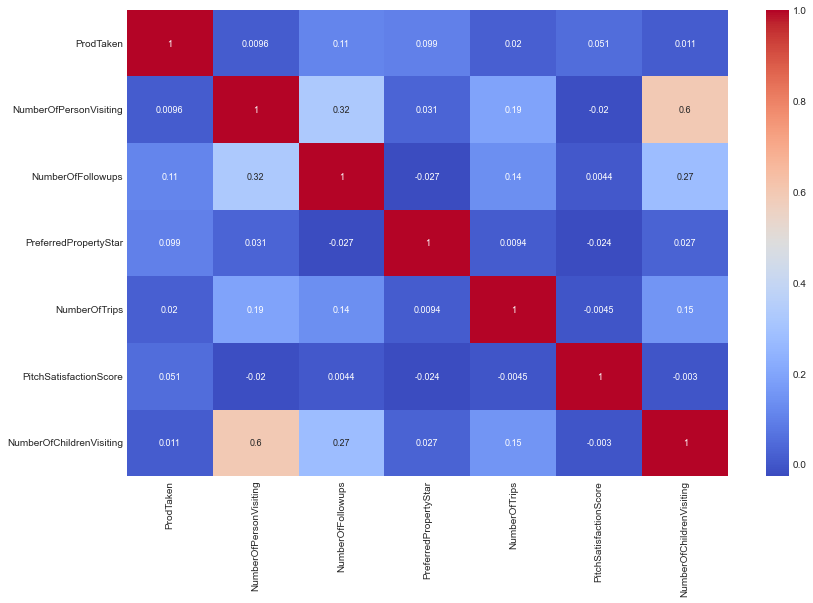

In [79]:
fig, ax = plt.subplots(figsize = (12, 8))   #resetting the size of the plots in canvas

sns.heatmap(corr, annot = True, cmap='coolwarm', annot_kws = {'size': 9});

* `The correlations of independent variables w.r.t the dependent variable are weak`


* `Number of person visiting is highly correlated with no. of children visiting`

##### Categorical Encoding:

* `Its better to use Dummy values approach for encoding the categorical columns as it gives the flexibility to encode as many categorical variables as we would want to and also gives the freedom to label the encoded columns using a prefix`

##### We will now convert the categorical columns into dummy variables. Then concatenate these new columns to the original dataframe. 


##### We will then drop the original columns and add 'drop_first=True' to avoid multi-variable trap or stop us encoding duplicate information

##### Let's take out all the categorical columns into one list:

In [80]:
#df.describe() gives stats only on numerical columns so remaining columns are categorical 
#we don't have any other data types in our dataset apart from float, int and categorical
#taking out the categorical columns into one list

cat_features = [col for col in df.columns if col not in df.describe().columns]

print(cat_features)

['CityTier', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Passport', 'OwnCar', 'Designation', 'TypeofContact_Imputed', 'Age_Group_Imputed', 'Talk_Duration_Imputed', 'Income_Group_Imputed']


In [81]:
#getting dummies for all the categorical columns by avoiding multi-variable trap
dummies = pd.get_dummies(df[['CityTier', 'Occupation', 'Gender', 'ProductPitched', 
                             'MaritalStatus', 'Passport', 'OwnCar', 'Designation', 'TypeofContact_Imputed', 
                             'Age_Group_Imputed', 'Talk_Duration_Imputed', 'Income_Group_Imputed']], drop_first=True)

#dropping the original columns after getting the dummies for all the categorical columns
df = df.drop(['CityTier', 'Occupation', 'Gender', 'ProductPitched', 
              'MaritalStatus', 'Passport', 'OwnCar', 'Designation', 'TypeofContact_Imputed', 
              'Age_Group_Imputed', 'Talk_Duration_Imputed', 'Income_Group_Imputed'], axis=1)

In [82]:
df = pd.concat([df,dummies], axis=1)     #concatening the dummy columns into the original dataframe

##### checking for categorical columns in our dataset:

In [83]:
df.select_dtypes(['category']).columns

Index([], dtype='object')

In [84]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

* `Now, we don't have any categorical columns in our dataframe`

##### Train/Test split:

In [85]:
X = df.drop(['ProdTaken'], axis=1)  #dropping the dependant variable for X

In [86]:
y = df['ProdTaken']    #taking the dependant variable as Y

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Scaling:

##### We didn't check for Outliers in the data and Its always better to use RobustScaler which scales the data based on quartiles range by excluding the outliers from scaling parameters like IQR, First Quartile etc., whereas the MinMaxScaler and the StandardScaler methods are very sensitive to outliers and thus will not help us to boost the performance of the model

In [88]:
scaler = RobustScaler()    #creating an instance for RobustScaler object

In [89]:
#we are calculating all the params required for robust scaling like IQR, Q1 etc..
#Then we will fit these scaling params which were learnt before and transforms the data 

X_train = scaler.fit_transform(X_train)        

In [90]:
X_test = scaler.transform(X_test)   #to avoid the data leakage we will only transform the X_test no fitting

In [91]:
X_train

array([[ 0., -1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1., -1.,  0., ...,  0.,  0.,  0.],
       ...,
       [-1., -1.,  1., ...,  0.,  0.,  0.],
       [ 0., -3.,  0., ...,  0.,  0.,  0.],
       [-1., -1.,  2., ...,  0.,  0.,  0.]])

In [92]:
X_train.shape

(3910, 38)

In [93]:
X_test

array([[-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1., -1.,  2., ...,  0.,  0.,  0.]])

In [94]:
y_train

2436    1
4765    0
2405    1
2424    1
4720    0
       ..
4079    0
4171    0
599     0
1361    0
1547    0
Name: ProdTaken, Length: 3910, dtype: int64

In [95]:
y_test

803     0
589     1
3736    0
3996    0
3491    0
       ..
3427    0
2154    0
1890    0
897     0
140     1
Name: ProdTaken, Length: 978, dtype: int64

### Model Building:

* `Finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:`



* Defining test options such as cross validation and the evaluation metric to use.


* Spot checking a suite of linear and nonlinear machine learning algorithms.


* Comparing the estimated f1-score of algorithms.
   
   
* `For this project, we will evaluate one linear, three non-linear and five ensemble algorithms:`


* `Linear Algorithm`: Logistic Regression



* `Non-Linear Algorithms`: Decision Trees (CART), Naive Bayes, k-Nearest Neighbors, and Support Vector Machine


* `Ensemble Algorithms`: Bagged CART, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting



* `The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.`

#### Set the test options and evaluation metrics:

##### Since the target variable in our dataset is very much unbalanced, we will use F1-score for evaluating the performance

In [96]:
# Run algorithms using 10-fold cross validation

num_folds = 10
scoring = 'f1'
seedNum = 101

In [97]:
# Set up Algorithms Spot-Checking Array

models = []
models.append(('LR', LogisticRegression(random_state=seedNum)))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(random_state=seedNum)))
models.append(('BT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))

results = []
names = []
metrics = []

In [98]:
# Generate model in turn

for name, model in models:
    
    #to register the starting time of model run
	startTimeModule = datetime.now()
    
    #to take random samples from the overall data and run for K-iterations
	kfold = KFold(n_splits=num_folds)
    
    #to train the model on multiple test-train splits and get evaluation metrics scores
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	metrics.append(cv_results.mean())
	msg = "%s: %f " % (name, cv_results.mean())
	print()
	print(msg)
	print()
	print ('Model training time:',(datetime.now() - startTimeModule))
	print('**********************')
print ('Average metrics (f1-score %) from all models:', np.mean(metrics))


LR: 0.396742 

Model training time: 0:00:00.222674
**********************

CART: 0.694207 

Model training time: 0:00:00.117285
**********************

KNN: 0.506520 

Model training time: 0:00:00.280524
**********************

SVM: 0.430845 

Model training time: 0:00:04.225434
**********************

BT: 0.721811 

Model training time: 0:00:00.647248
**********************

RF: 0.655039 

Model training time: 0:00:02.155980
**********************

ET: 0.752855 

Model training time: 0:00:02.253119
**********************

AB: 0.382237 

Model training time: 0:00:00.992532
**********************

GBM: 0.482573 

Model training time: 0:00:02.929932
**********************
Average metrics (f1-score %) from all models: 0.5580921036596925


##### F1 scores can range from 0 to 1, with 1 representing a model that perfectly classifies each observation into the correct class and 0 representing a model that is unable to classify any observation into the correct class

##### Here, Bagged CART and Extra Trees Classifier models achieved high f1-scores.

##### Let's tune the models to achieve a better f1-score there by improving the performance of the models:

### Tuning the Algorithms:

##### Tuning algorithm 01: Bagged CART

In [99]:
#to register the starting time of model run
startTimeModule = datetime.now()

#setting up the parameter grid with no. of estimators of different values
paramGrid1 = dict(n_estimators=np.array([50,100,150,200,250]))

model1 = BaggingClassifier(random_state=seedNum)

#to take random samples from the overall data and run for K-iterations
kfold = KFold(n_splits=num_folds)

#using gridsearchCV for hyper parameter tuning
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(X_train, y_train)

#priniting the best params
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('BT')

means = grid_result1.cv_results_['mean_test_score']
params = grid_result1.cv_results_['params']

for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.770032 using {'n_estimators': 200}
0.761395 with: {'n_estimators': 50}
0.769839 with: {'n_estimators': 100}
0.768097 with: {'n_estimators': 150}
0.770032 with: {'n_estimators': 200}
0.764896 with: {'n_estimators': 250}
Model training time: 0:00:47.994008


##### In Bagged CART, the best cross validated f1-score is 0.77 obtained with no. of estimators as 200
-------

##### Tuning Algorithm 02: Extra Trees Classifier

In [100]:
#to register the starting time of model run
startTimeModule = datetime.now()

#setting up the parameter grid with no. of estimators of different values
paramGrid2 = dict(n_estimators=np.array([100,150,200,250,300]))

model2 = ExtraTreesClassifier(random_state=seedNum)

#to take random samples from the overall data and run for K-iterations
kfold = KFold(n_splits=num_folds)

#using gridsearchCV for hyper parameter tuning
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, y_train)

#priniting the best params
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('ET')

means = grid_result2.cv_results_['mean_test_score']
params = grid_result2.cv_results_['params']

for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.765376 using {'n_estimators': 300}
0.752855 with: {'n_estimators': 100}
0.754216 with: {'n_estimators': 150}
0.755929 with: {'n_estimators': 200}
0.762910 with: {'n_estimators': 250}
0.765376 with: {'n_estimators': 300}
Model training time: 0:00:23.135570


##### In Extra Trees, the best cross validated f1-score is 0.765 obtained with no. of estimators as 300


### Finalize the Model:

* `Both the models performed well, but let's take Bagged CART as our final model to be evaluated further as it is slightly have a better f1-score than Extra Trees classifier`


* `Finalizing a model may involve sub-tasks such as:`


* Using an optimal model tuned to make predictions on unseen data.


* Creating a standalone model using the tuned parameters.

##### Predictions on Test data:

In [101]:
#Bagged CART model with 50 estimators and setting the random state 
model = BaggingClassifier(n_estimators=200, random_state=seedNum)

#fitting the model on the training data
model.fit(X_train, y_train)

#making predictions on test data
predictions = model.predict(X_test)

print('F1 Score of the model is: {}'.format(f1_score(y_test, predictions)))

print()
print('Confusion Matrix:')
print('*******************')
print(confusion_matrix(y_test, predictions))
print()
print('Classification Report:')
print('***********************')
print(classification_report(y_test, predictions))

F1 Score of the model is: 0.8146067415730337

Confusion Matrix:
*******************
[[767  18]
 [ 48 145]]

Classification Report:
***********************
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       785
           1       0.89      0.75      0.81       193

    accuracy                           0.93       978
   macro avg       0.92      0.86      0.89       978
weighted avg       0.93      0.93      0.93       978



### Create standalone model on entire training dataset:

In [102]:
#to register the starting time of model run
startTimeModule = datetime.now()

#Final Bagged CART model with 50 estimators and setting the random state
finalModel = BaggingClassifier(n_estimators=200, random_state=seedNum)

#fitting the final Bagged CART Model on the entire data 
finalModel.fit(X, y)

print('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:01.644169


### Which customer is more likely to purchase the newly introduced travel package:

In [103]:
#getting each feature importance values for purchasing the new package

feature_importances = np.mean([
    tree.feature_importances_ for tree in finalModel.estimators_
], axis=0)

feature_importances

array([0.03142455, 0.06482978, 0.05433342, 0.09276566, 0.08586855,
       0.03195546, 0.01400992, 0.04574024, 0.02000748, 0.02097165,
       0.01964539, 0.03420709, 0.0064703 , 0.00245752, 0.00576961,
       0.00370637, 0.01778805, 0.03198726, 0.02325453, 0.06912598,
       0.02615505, 0.07717191, 0.00631554, 0.00612413, 0.00223435,
       0.03272309, 0.02156166, 0.02907985, 0.02075579, 0.01427105,
       0.0254963 , 0.0247605 , 0.01969189, 0.        , 0.01685044,
       0.        , 0.        , 0.00048967])

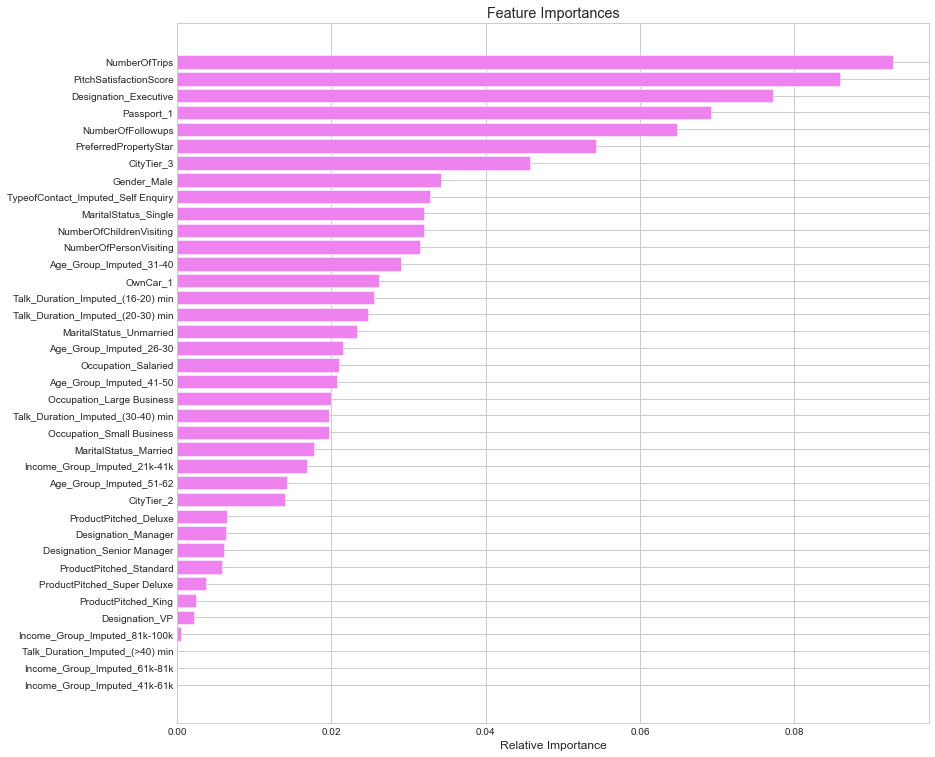

In [104]:
#plotting bar graph to show how much each feature is influencing to purchase the new package

indices = np.argsort(feature_importances)
feature_names = X.columns

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), feature_importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* `We can say customers who are working as Executives in their respective fields are more likely to purchase the new package`


* `Customers having passport with them are more likley to purchase the new package`


* `Customers coming from Tier 3 cities are more likely to purchase the new package`


* `Customer who are Single, Male, Aged between 31-40 and having a own car are most likely to purchase the new package`